In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
diamond=pd.read_csv('diamonds.csv')

In [6]:
diamond.shape

(53940, 11)

In [7]:
diamond.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
35009,35010,0.40,Good,F,SI1,63.6,56.0,882,4.68,4.63,2.96
22090,22091,1.58,Very Good,I,VS1,61.8,57.0,10112,7.50,7.56,4.64
17275,17276,1.07,Ideal,G,VS1,61.8,57.0,6917,6.58,6.52,4.05
11918,11919,1.16,Ideal,J,SI1,61.8,55.0,5124,6.75,6.78,4.18
5294,5295,1.01,Premium,E,SI2,60.4,57.0,3801,6.53,6.49,3.93
9678,9679,1.04,Ideal,H,SI1,62.5,57.0,4648,6.50,6.46,4.05
23404,23405,1.52,Very Good,J,VVS2,62.1,60.0,11392,7.33,7.36,4.56
30531,30532,0.30,Ideal,G,VVS1,60.6,57.0,734,4.36,4.38,2.65
49877,49878,0.70,Very Good,H,SI1,63.4,61.0,2176,5.62,5.58,3.55
3945,3946,0.71,Ideal,D,SI1,61.8,56.0,3502,5.72,5.76,3.54


## Feature Engineering

In [8]:
diamond = diamond.drop(diamond.loc[diamond.x <= 0].index)
diamond = diamond.drop(diamond.loc[diamond.y <= 0].index)
diamond = diamond.drop(diamond.loc[diamond.z <= 0].index)

In [9]:
diamond["ratio"] = diamond.x / diamond.y

In [10]:
diamond.drop(columns='Unnamed: 0',inplace=True)

## Feature Encoding

In [11]:
diamond_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

diamond_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

diamond_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

In [12]:
diamond.cut = diamond.cut.map(diamond_cut);
diamond.clarity = diamond.clarity.map(diamond_clarity);
diamond.color = diamond.color.map(diamond_color);

In [13]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ratio
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [51]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
ratio      0
dtype: int64

In [14]:
X=diamond.drop(columns='price')
y=diamond['price']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (37744, 10)
Shape of x_test:  (16176, 10)
Shape of y_train:  (37744,)
Shape of y_test:  (16176,)


In [32]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y,sm.add_constant(X)).fit()

In [33]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.277e+04
Date:                Mon, 02 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:14:18   Log-Likelihood:            -4.5943e+05
No. Observations:               53920   AIC:                         9.189e+05
Df Residuals:                   53909   BIC:                         9.190e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8368.7150    663.727     12.609      0.0

In [114]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(X,y)
y_pred = LR.predict(X)

## Linear Regression Assumptions

1. __Linearity__

2. __Normality__

3. __Homoscedasticity__

4. __No Autocorrelation__

5. __No Multicollinearity__

## 1. Linearity test


- Linear regression needs the relationship between the independent and dependent variables to be linear.

In [19]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'ratio'],
      dtype='object')

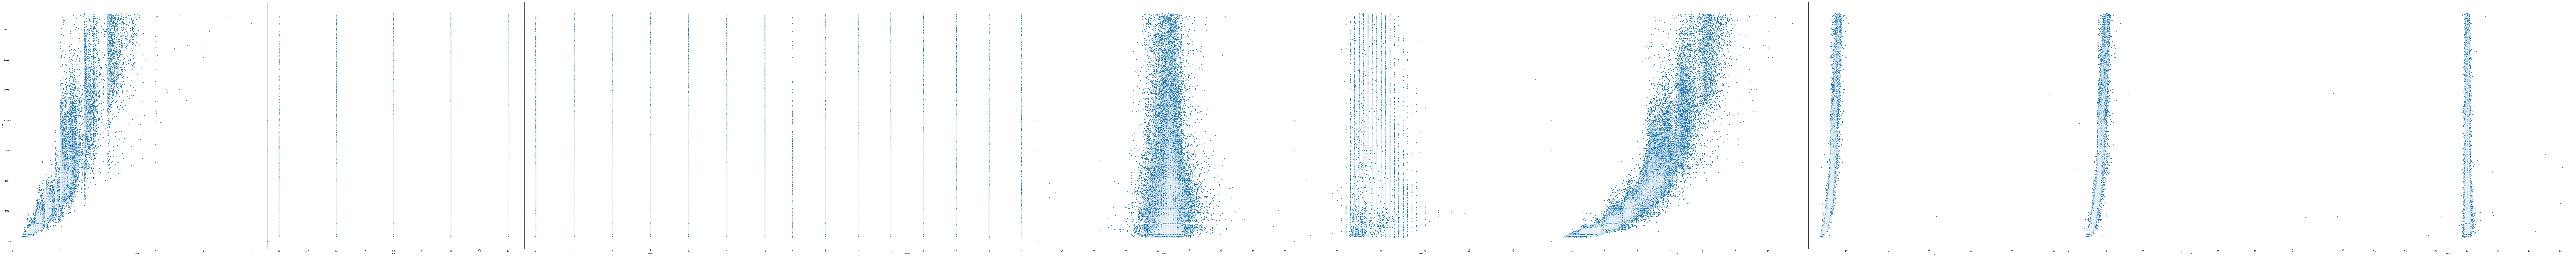

In [27]:
sns.pairplot(diamond,x_vars=['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z','ratio'],
             y_vars='price',height=20)

- __We Couldnt exactly find the linear relationship between X and Y using Scatter Plot__

- __So we try using Statistical Tests For Linearity__

__RAINBOW TEST FOR LINEARITY__


- The Null hypothesis is that the regression is correctly modelled as linear

- The alternative for which the power might be large are convex

In [218]:
import statsmodels.stats.api as sm
f,p=sm.linear_rainbow(model1)
p

0.9999999999999999

__Inference__: The P Values is > 0.05 , therby we Failed to Reject Null Hypothesis


__The Test proves that the relationship is LINEAR__

## 2. Normality test


- Normal Distribution of error terms: The error terms should be normally distributed. If the residuals are not skewed, that means that the assumption is satisfied.

### Plotting the graph using the residuals to visually inspect whether the errors are normally distributed 

(-6000, 6000)

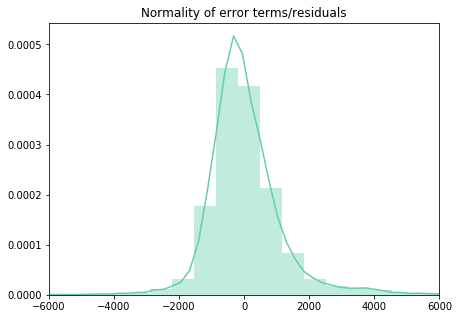

In [277]:
plt.figure(figsize=(7,5))
sns.distplot(residual,kde=True,color="mediumaquamarine")
plt.title('Normality of error terms/residuals')
plt.xlim(-6000,6000)

#### Visually it seems to be normal but lets verify it using the statistical Tests

__TEST No : 1 - Normality of the Errors - QQ Plot using ProbPlot__

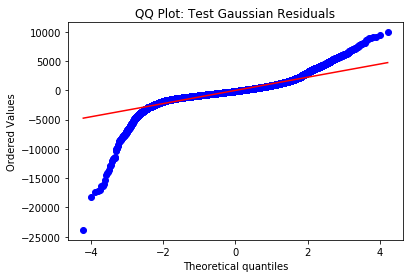

In [278]:
import pylab 
import scipy.stats as stats 
stats.probplot(residual, dist="norm", plot=pylab) # normal probability plot 
pylab.title('QQ Plot: Test Gaussian Residuals') 
pylab.show()

__TEST No : 2 - Normality of the Errors - QQ Plot using QQ Plot__

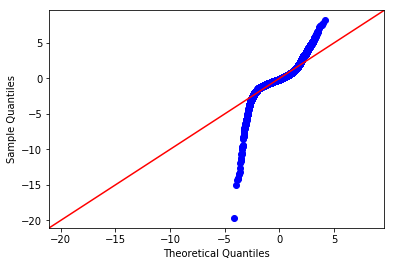

In [279]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

fig = sm.qqplot(residual,fit=True, line='45')
plt.show()

- __The Data Points not perfectly fit with the line , which implies the errors are not normally distributed__

- __Lets Check this usings Statistical Tests__

#### TEST No : 3 - Normality of the Errors - JARQUE BERA TEST

- __Null_Hypo__ : The data is normally distributed 


- __Alternate_Hypo__ : The data follow some other distribution.

In [280]:
from scipy.stats import jarque_bera
    
jb_value,p_val=jarque_bera(residual)

p_val

0.0

#### TEST No : 4 - Normality of the Errors - Omnibus test for normality

- __Null_Hypo__ : The data is normally distributed 


- __Alternate_Hypo__ : The data follow some other distribution.

In [281]:
sms.omni_normtest(residual)

NormaltestResult(statistic=12741.462000103029, pvalue=0.0)

__Inference__: The P Values is < 0.05 , therby we Reject Null Hypothesis


__The Test proves that the Errors are Not Normally Distributed__

## 3. Homoscedatiscity test

- The presence of non-constant variance in the error terms results in heteroskedasticity. 

- Generally, non-constant variance arises in presence of outliers or extreme leverage values. 

- Look like, these values get too much weight, thereby disproportionately influences the model’s performance.


__TEST No : 1 - Visual Inspection - Homoscedatiscity test - Y_pred Vs Residual Plot__

- __You can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern__


- __Heteroscedasticity produces a distinctive fan or cone shape in residual plots.__

Text(0.5, 1.0, 'Predicted vs Residuals for Hetroscedasticity check')

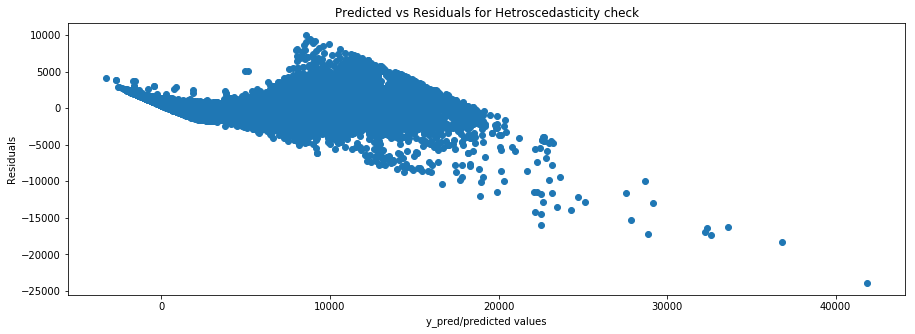

In [282]:
plt.figure(figsize=(15,5))
plt.scatter(y_pred,residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals for Hetroscedasticity check')

- __Funnel Shape Pattern could be seen , so heteroskedasticity might Exists.__

- __We ll verify it using Statistical Test__

__TEST No : 2 - Homoscedatiscity test - Breuschpagan Test__

- __Null_Hypo__ : All observations have the same error variance, i.e. errors are homoscedastic.


- __Alternate_Hypo__ :The errors doesnt have same varianve i.e. hetroscedastic.


In [283]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residual,X)
print ('p-value for the lagrange multiplier test statistic is %f' % (lm_pvalue))

p-value for the lagrange multiplier test statistic is 0.000000


__Inference : The P-Value is < 0.05 , therby we reject Null Hypothesis__
    
__Hetroscedatiscity exists__    

## 4. Autocorrelation 

- Linear regression analysis requires that there is little or no autocorrelation in the data.

- Autocorrelation occurs when the residuals are not independent from each other.

- The presence of correlation in error terms drastically reduces model’s accuracy.

- This usually occurs in time series models where the next instant is dependent on previous instant.

__TEST No : 1 - Autocorrelation test - Durbin Watson Test__

- Durbin-Watson’s  tests the null hypothesis that the residuals are not auto-correlated.


- It must lie between 0 and 4. 


- If DW = 2, implies no autocorrelation, 


- 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation.

In [284]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residual)

1.1600686342046533

#### The Values from Durbin Watson Test is < 2 , Therby There is Autocorrelation

__TEST No : 2 - Autocorrelation test - Breusch Godfrey Test__
    
- __Null Hypothesis__       :        No Autocorrelation

- __Alternative Hypothesis__ : Autocorrelation is present.

In [285]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

acorr_breusch_godfrey(model1)

(28149.547935180428, 0.0, 1031.9920915437674, 0.0)

__TEST No : 3 - Autocorrelation test - Ljung-Box & Box-Pierce_value Test__


__Null Hypothesis__        : Autocorrelation is absent.

__Alternative Hypothesis__ : Autocorrelation is present.

In [286]:
from statsmodels.stats.diagnostic import acorr_ljungbox

name=['Ljung-Box','Ljung-Box_P-Val','Box-Pierce_value','Box-Pierce_P-val'] 
test=acorr_ljungbox(residual,boxpierce=True)
lzip(name,test)
#Ljung-Box test is reported to have better small sample properties.

[('Ljung-Box',
  array([  9509.9565151 ,  16242.72824549,  22646.34683848,  28177.36307823,
          33700.62446151,  39127.99604222,  44451.72311552,  49453.00928155,
          54261.36130692,  59111.74245321,  63804.55018775,  68300.79401733,
          72440.67189136,  76415.31999551,  80702.77560762,  84696.01477099,
          88749.03559099,  92689.66343304,  96436.06171279, 100261.31563901,
         103924.32977289, 107522.49716074, 110999.46187076, 114196.62366439,
         117453.49932648, 120718.7654951 , 123793.68188592, 126800.54601821,
         129700.08435815, 132764.33271605, 135981.71378006, 139075.55905374,
         142202.648856  , 145299.97443298, 148232.42618691, 151206.52142823,
         153944.60740427, 156936.12499554, 159710.96092057, 162670.46883288])),
 ('Ljung-Box_P-Val',
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.])),
 

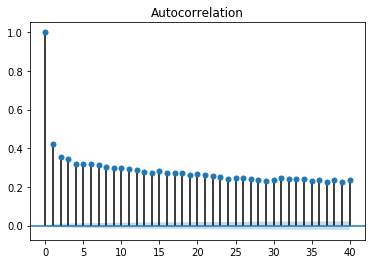

In [287]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residual, lags=40)
plt.show()

### INFERENCE : P-Value < 0.05 , Therby we Reject Null Hypothesis

### - There is Auto Correlation

## 5. Multicollinearity

In [288]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [289]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [290]:
vif

,VIF_Factor,features
0,93.152414,carat
1,11.008855,cut
2,5.601311,color
3,5.346015,clarity
4,2735.278578,depth
5,964.813528,table
6,2246.301929,x
7,639.477209,y
8,785.949324,z
9,5413.106999,ratio


### INFERENCE : 

- Based on the WARNING 2 in OLS , it says Strong Multi Collineaity

- Also on verifying VIF we could see the VIF_Factor is >10 for most 


- There is __Strong Multicollinearity__

## CONCLUSION TABLE :

In [291]:
pd.DataFrame({'TEST':['Linearity','Normality','Homoscedatiscity','AutoCorrelation','MultiCollinearity'],
              
'RESULTS':['Linear','Normally Distributed','Hetroscedatiscity Exists','Auto Correlation Exists','Strong Multicollinearity']},index=[1,2,3,4,5])

,TEST,RESULTS
1,Linearity,Linear
2,Normality,Normally Distributed
3,Homoscedatiscity,Hetroscedatiscity Exists
4,AutoCorrelation,Auto Correlation Exists
5,MultiCollinearity,Strong Multicollinearity


- It Seems only 2 of the 5 assumptions of the linear Regression is Satisfied


- So the other Regression methods such as Tree based methods might perform better than the linear Regression method

## Linear Regression and Random Forest Comparison

### Linear Regression

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred_LR= LR.predict(x_test)

# finding the mean_squared error
mse_LR = mean_squared_error(y_test, y_pred_LR)
print("RMSE Error:", np.sqrt(mse_LR))

# finding the r2 score or the variance
r2_LR = r2_score(y_test, y_pred_LR)
print("R2 Score:", r2_LR)

RMSE Error: 1218.4064963282744
R2 Score: 0.9063629640865761


## Random Foresr Regressor

In [293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred_RF= RF.predict(x_test)

# finding the mean_squared error
mse_RF = mean_squared_error(y_test, y_pred_RF)
print("RMSE Error:", np.sqrt(mse_RF))

# finding the r2 score or the variance
r2_RF = r2_score(y_test, y_pred_RF)
print("R2 Score:", r2_RF)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Error: 565.88845654922
R2 Score: 0.9798012303867979


### CONCLUSION : The Tree Based method out perform the linear regresssion since most of the assumptions were NOT SATISFIED